In [1]:
import pandas
import os
import csv
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import time
import calendar
import ROOT as r

Welcome to JupyROOT 6.12/06


In [62]:
file = "./data/gm2nearline_hists_run24750_00258.root" #eventually from command line
runNum = int(file.split("run")[1].split("_")[0])
print(runNum)

24750


In [53]:
f = r.TFile(file)

In [54]:
#f.cd("CoincidenceFinderLM")
f.ls()

TFile**		./data/gm2nearline_hists_run24750_00258.root	
 TFile*		./data/gm2nearline_hists_run24750_00258.root	
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAnalyzer;1	ibmsAnalyzer (IBMSAnalyzer) folder
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	FastRotation;1	FastRotation


In [55]:
nearlineCtag = f.Get("nearlineHistTree").Get("nearlineCTag").Clone()
caloNumtriple = f.Get("CoincidenceFinderLM").Get("caloNumtriple_").Clone()
caloNumdouble = f.Get("CoincidenceFinderLM").Get("caloNumdouble_").Clone()

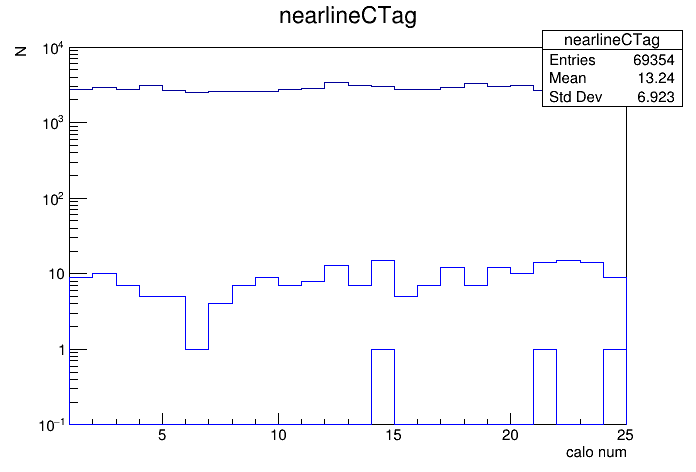

In [56]:
c = r.TCanvas()
nearlineCtag.Draw()
nearlineCtag.GetYaxis().SetRangeUser(0.1,10000)
caloNumdouble.Draw("SAME")
caloNumtriple.Draw("SAME")
c.SetLogy()
c.Draw()

In [57]:
normDoubles = []
normTriples = []
ctag = []

for calo in range(1,25):
    ctagbin = nearlineCtag.FindBin(calo)
    doublebin = caloNumdouble.FindBin(calo)
    triplebin = caloNumtriple.FindBin(calo)
    
    #print(calo, ctagbin, doublebin, triplebin)
    
    normDoublei = caloNumdouble.GetBinContent(doublebin) / nearlineCtag.GetBinContent(ctagbin)
    normTriplei = caloNumtriple.GetBinContent(triplebin) / nearlineCtag.GetBinContent(ctagbin)
    
    normDoubles.append(normDoublei)
    normTriples.append(normTriplei)
    ctag.append(nearlineCtag.GetBinContent(ctagbin))
    

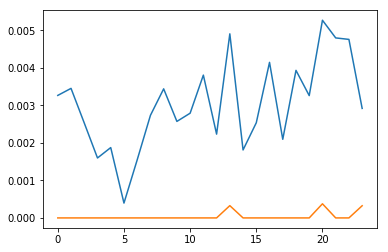

In [58]:
plt.plot(normDoubles)
plt.plot(normTriples)
plt.show()

In [67]:
print(finalVec)
fout= open("lostMuonData.txt","w+")
fout.write(str(finalVec)+" \n")
fout.close()

(24750, [0.003266787658802178, 0.0034542314335060447, 0.0025307302964569776, 0.00159846547314578, 0.0018754688672168042, 0.00039556962025316455, 0.0015479876160990713, 0.002734375, 0.0034416826003824093, 0.002573529411764706, 0.002792321116928447, 0.003807850029291154, 0.0022342802425789976, 0.004908376963350785, 0.001812250815512867, 0.0025380710659898475, 0.00414794331144141, 0.0020964360587002098, 0.003934426229508197, 0.0032615786040443573, 0.005271084337349397, 0.0048, 0.0047602856171370285, 0.0029201817001946787], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003272251308900524, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00037650602409638556, 0.0, 0.0, 0.0003244646333549643], [2755.0, 2895.0, 2766.0, 3128.0, 2666.0, 2528.0, 2584.0, 2560.0, 2615.0, 2720.0, 2865.0, 3414.0, 3133.0, 3056.0, 2759.0, 2758.0, 2893.0, 3339.0, 3050.0, 3066.0, 2656.0, 3125.0, 2941.0, 3082.0])


In [72]:
print(finalVec)
for i in range(10):
    testVec = (runNum + 1 + i, normDoubles, normTriples, ctag)
    #fout= open("lostMuonData.txt","w+")
    with open('lostMuonData.txt', 'a') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter='|')
        spamwriter.writerow(testVec)

(24750, [0.003266787658802178, 0.0034542314335060447, 0.0025307302964569776, 0.00159846547314578, 0.0018754688672168042, 0.00039556962025316455, 0.0015479876160990713, 0.002734375, 0.0034416826003824093, 0.002573529411764706, 0.002792321116928447, 0.003807850029291154, 0.0022342802425789976, 0.004908376963350785, 0.001812250815512867, 0.0025380710659898475, 0.00414794331144141, 0.0020964360587002098, 0.003934426229508197, 0.0032615786040443573, 0.005271084337349397, 0.0048, 0.0047602856171370285, 0.0029201817001946787], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003272251308900524, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00037650602409638556, 0.0, 0.0, 0.0003244646333549643], [2755.0, 2895.0, 2766.0, 3128.0, 2666.0, 2528.0, 2584.0, 2560.0, 2615.0, 2720.0, 2865.0, 3414.0, 3133.0, 3056.0, 2759.0, 2758.0, 2893.0, 3339.0, 3050.0, 3066.0, 2656.0, 3125.0, 2941.0, 3082.0])


---

### Now lets create the overall trend plots

In [109]:
fdata = "./lostMuonData.txt"
tempVec = []

with open(fdata) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='|')
    line_count = 0
    for row in csv_reader:
        try:
            runNum = int(row[0])
            #print(caloNum)
            doubles = []
            for x in row[1][1:-1].split(','):
                doubles.append(float(x))

            triples = []
            for x in row[2][1:-1].split(','):
                triples.append(float(x))
                    
            ctag = []
            for x in row[3][1:-1].split(','):
                ctag.append(float(x))
            
            vec = [runNum, doubles, triples, ctag]
            #for x in ding:
            #    #print(x)
            #    vec.append(float(x))
            tempVec.append(vec)
        except:
            print("ERROR: ", row)

            line_count += 1
            if(line_count > 50):
                break

#tempVec.append(tempVeci)

#print(tempVec)

In [110]:
print(tempVec[:2])

[[24760, [0.003266787658802178, 0.0034542314335060447, 0.0025307302964569776, 0.00159846547314578, 0.0018754688672168042, 0.00039556962025316455, 0.0015479876160990713, 0.002734375, 0.0034416826003824093, 0.002573529411764706, 0.002792321116928447, 0.003807850029291154, 0.0022342802425789976, 0.004908376963350785, 0.001812250815512867, 0.0025380710659898475, 0.00414794331144141, 0.0020964360587002098, 0.003934426229508197, 0.0032615786040443573, 0.005271084337349397, 0.0048, 0.0047602856171370285, 0.0029201817001946787], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003272251308900524, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00037650602409638556, 0.0, 0.0, 0.0003244646333549643], [2755.0, 2895.0, 2766.0, 3128.0, 2666.0, 2528.0, 2584.0, 2560.0, 2615.0, 2720.0, 2865.0, 3414.0, 3133.0, 3056.0, 2759.0, 2758.0, 2893.0, 3339.0, 3050.0, 3066.0, 2656.0, 3125.0, 2941.0, 3082.0]], [24751, [0.003266787658802178, 0.0034542314335060447, 0.0025307302964569776, 0.00159846547314578, 0.0

In [111]:
df = pandas.DataFrame(tempVec, columns=['run','doubles','triples','ctag'])

In [112]:
df.head()

,run,doubles,triples,ctag
0,24760,"[0.003266787658802178, 0.0034542314335060447, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2755.0, 2895.0, 2766.0, 3128.0, 2666.0, 2528...."
1,24751,"[0.003266787658802178, 0.0034542314335060447, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2755.0, 2895.0, 2766.0, 3128.0, 2666.0, 2528...."
2,24752,"[0.003266787658802178, 0.0034542314335060447, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2755.0, 2895.0, 2766.0, 3128.0, 2666.0, 2528...."
3,24753,"[0.003266787658802178, 0.0034542314335060447, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2755.0, 2895.0, 2766.0, 3128.0, 2666.0, 2528...."
4,24754,"[0.003266787658802178, 0.0034542314335060447, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2755.0, 2895.0, 2766.0, 3128.0, 2666.0, 2528...."


In [115]:
tempVec.sort()
allRuns, allDoubles, allTriples, allCtags = zip(*tempVec)

(24751, 24752, 24753, 24754, 24755, 24756, 24757, 24758, 24759, 24760, 24760)


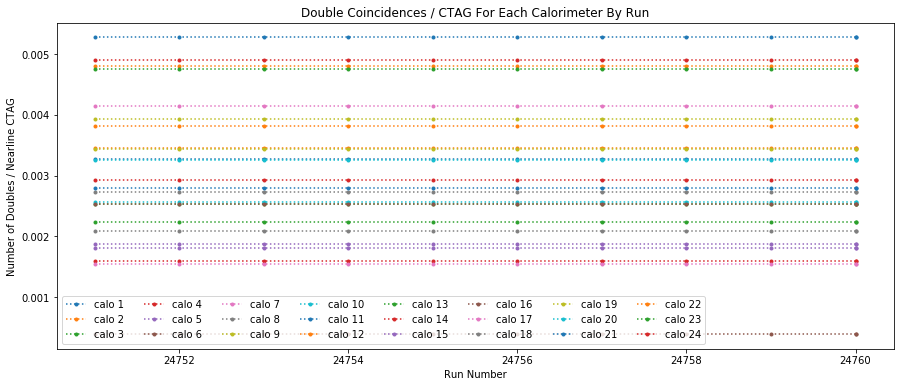

In [116]:
print(allRuns)
#print(allDoubles)
fig,ax = plt.subplots(figsize=(15,6))
plt.title("Double Coincidences / CTAG For Each Calorimeter By Run")
plt.xlabel("Run Number")
plt.ylabel("Number of Doubles / Nearline CTAG")
calo = 1
for caloDouble in zip(*allDoubles):
    #print(calo, caloDouble)
    plt.plot(allRuns, caloDouble, ".:", label="calo "+str(calo))
    calo += 1
    
plt.legend(ncol=8)
plt.savefig("./Doubles_Over_CTAG_All_Calorimeters.png",bbox_inches="tight")

plt.show()

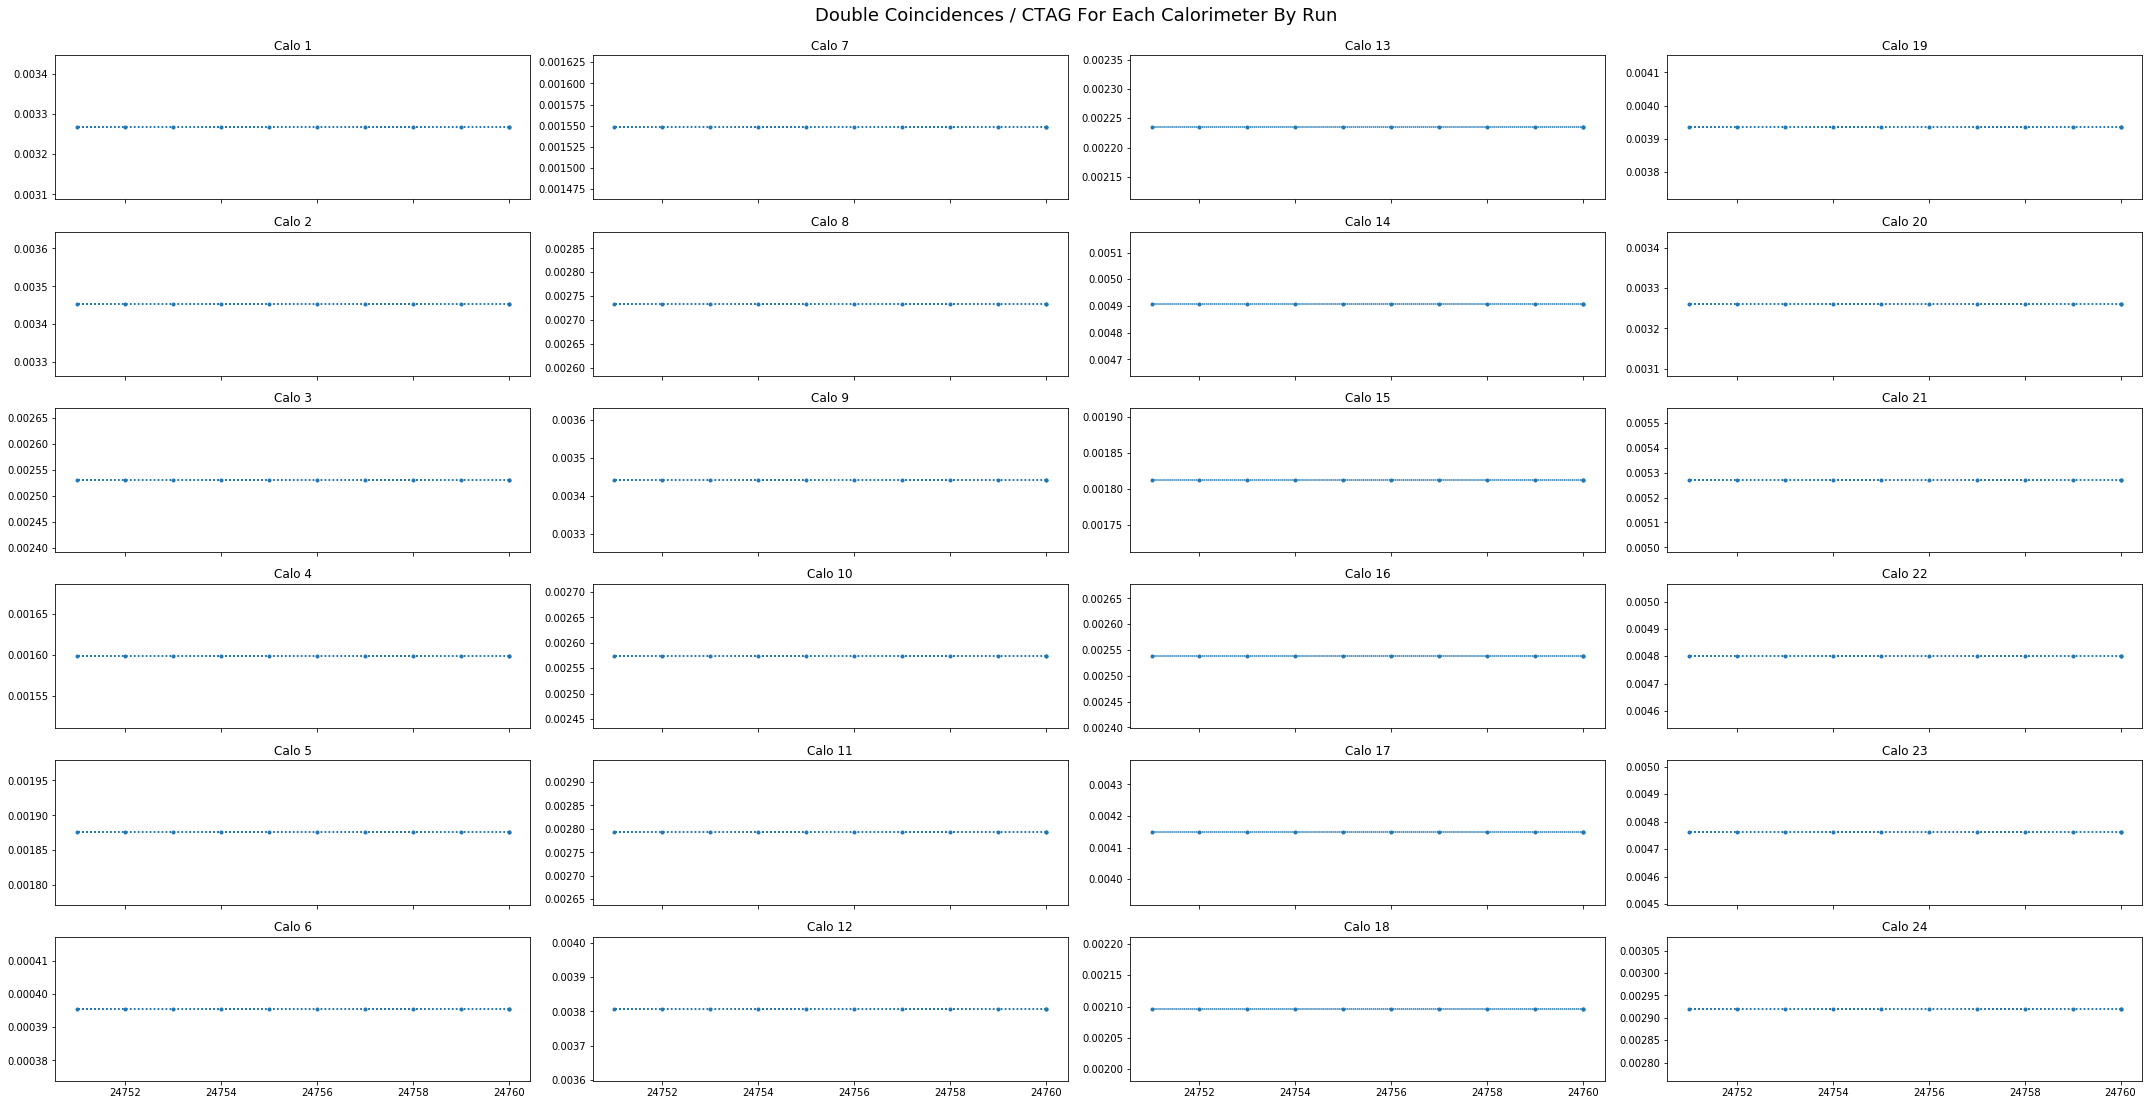

In [95]:
width = 6
fig, ax = plt.subplots(width,4,figsize=(30,15),sharex = True)

calo = 1
for caloDouble in zip(*allDoubles):
    #print(calo, caloDouble)
    i = calo -1
    axi = ax[i % width][int(i/width)]
    axi.plot(allRuns, caloDouble, ".:", label="calo "+str(calo))
    axi.set_title("Calo "+str(calo))
    calo += 1
    
plt.tight_layout()
plt.suptitle("Double Coincidences / CTAG For Each Calorimeter By Run",fontsize=18, y=1.02)

plt.savefig("./Doubles_Over_CTAG_By_Calorimeter.png",bbox_inches="tight")

plt.show()

(24760, 24751, 24752, 24753, 24754, 24755, 24756, 24757, 24758, 24759, 24760)


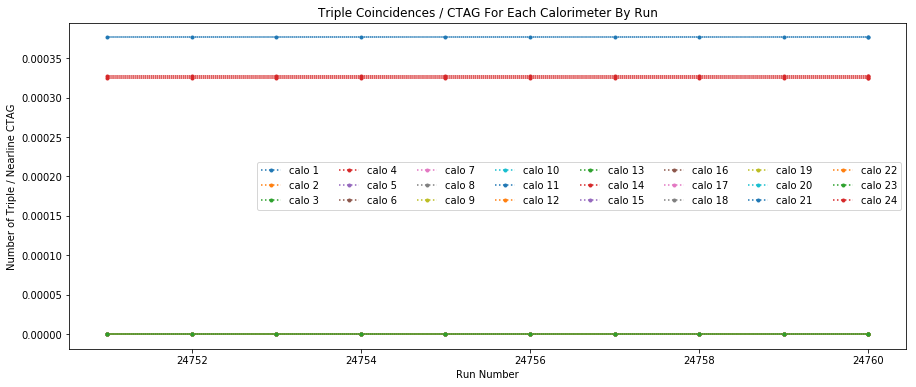

In [96]:
print(allRuns)
#print(allDoubles)
fig,ax = plt.subplots(figsize=(15,6))
plt.title("Triple Coincidences / CTAG For Each Calorimeter By Run")
plt.xlabel("Run Number")
plt.ylabel("Number of Triple / Nearline CTAG")
calo = 1
for caloTriple in zip(*allTriples):
    #print(calo, caloDouble)
    plt.plot(allRuns, caloTriple, ".:", label="calo "+str(calo))
    calo += 1
    
plt.legend(ncol=8)
plt.savefig("./Triples_Over_CTAG_All_Calorimeters.png",bbox_inches="tight")

plt.show()

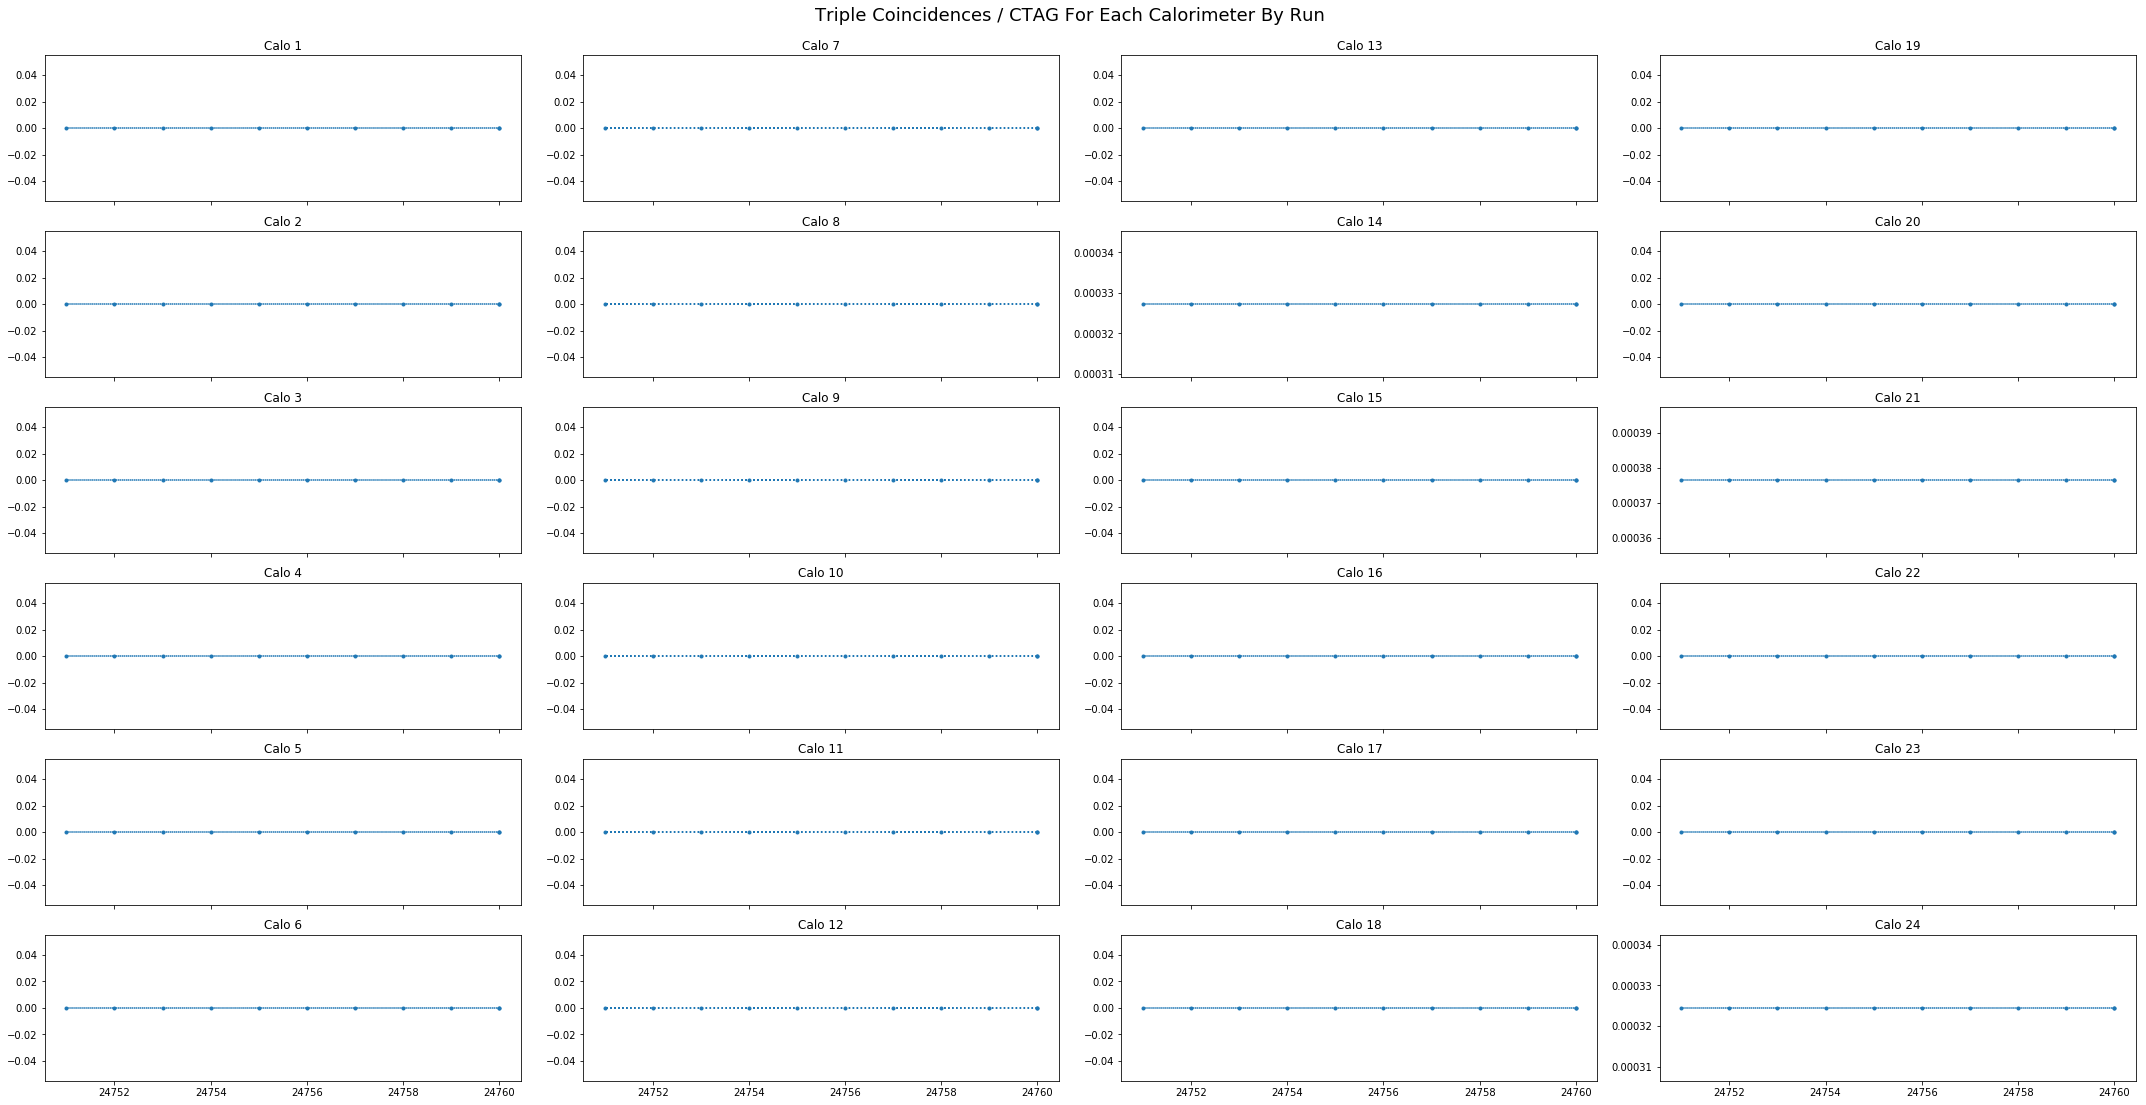

In [97]:
width = 6
fig, ax = plt.subplots(width,4,figsize=(30,15),sharex = True)

calo = 1
for caloDouble in zip(*allTriples):
    #print(calo, caloDouble)
    i = calo -1
    axi = ax[i % width][int(i/width)]
    axi.plot(allRuns, caloDouble, ".:", label="calo "+str(calo))
    axi.set_title("Calo "+str(calo))
    calo += 1
    
plt.tight_layout()
plt.suptitle("Triple Coincidences / CTAG For Each Calorimeter By Run",fontsize=18, y=1.02)

plt.savefig("./Triples_Over_CTAG_By_Calorimeter.png",bbox_inches="tight")

plt.show()

(24760, 24751, 24752, 24753, 24754, 24755, 24756, 24757, 24758, 24759, 24760)


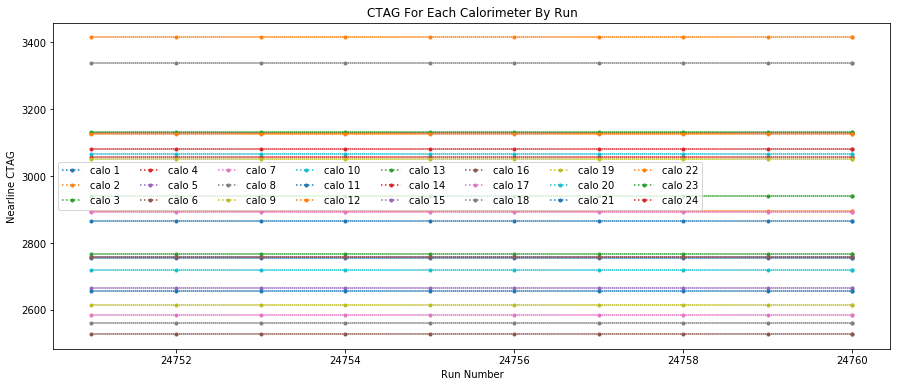

In [98]:
print(allRuns)
#print(allDoubles)
fig,ax = plt.subplots(figsize=(15,6))
plt.title("CTAG For Each Calorimeter By Run")
plt.xlabel("Run Number")
plt.ylabel("Nearline CTAG")
calo = 1
for caloTriple in zip(*allCtags):
    #print(calo, caloDouble)
    plt.plot(allRuns, caloTriple, ".:", label="calo "+str(calo))
    calo += 1
    
plt.legend(ncol=8)
plt.savefig("./CTAG_All_Calorimeters.png",bbox_inches="tight")

plt.show()

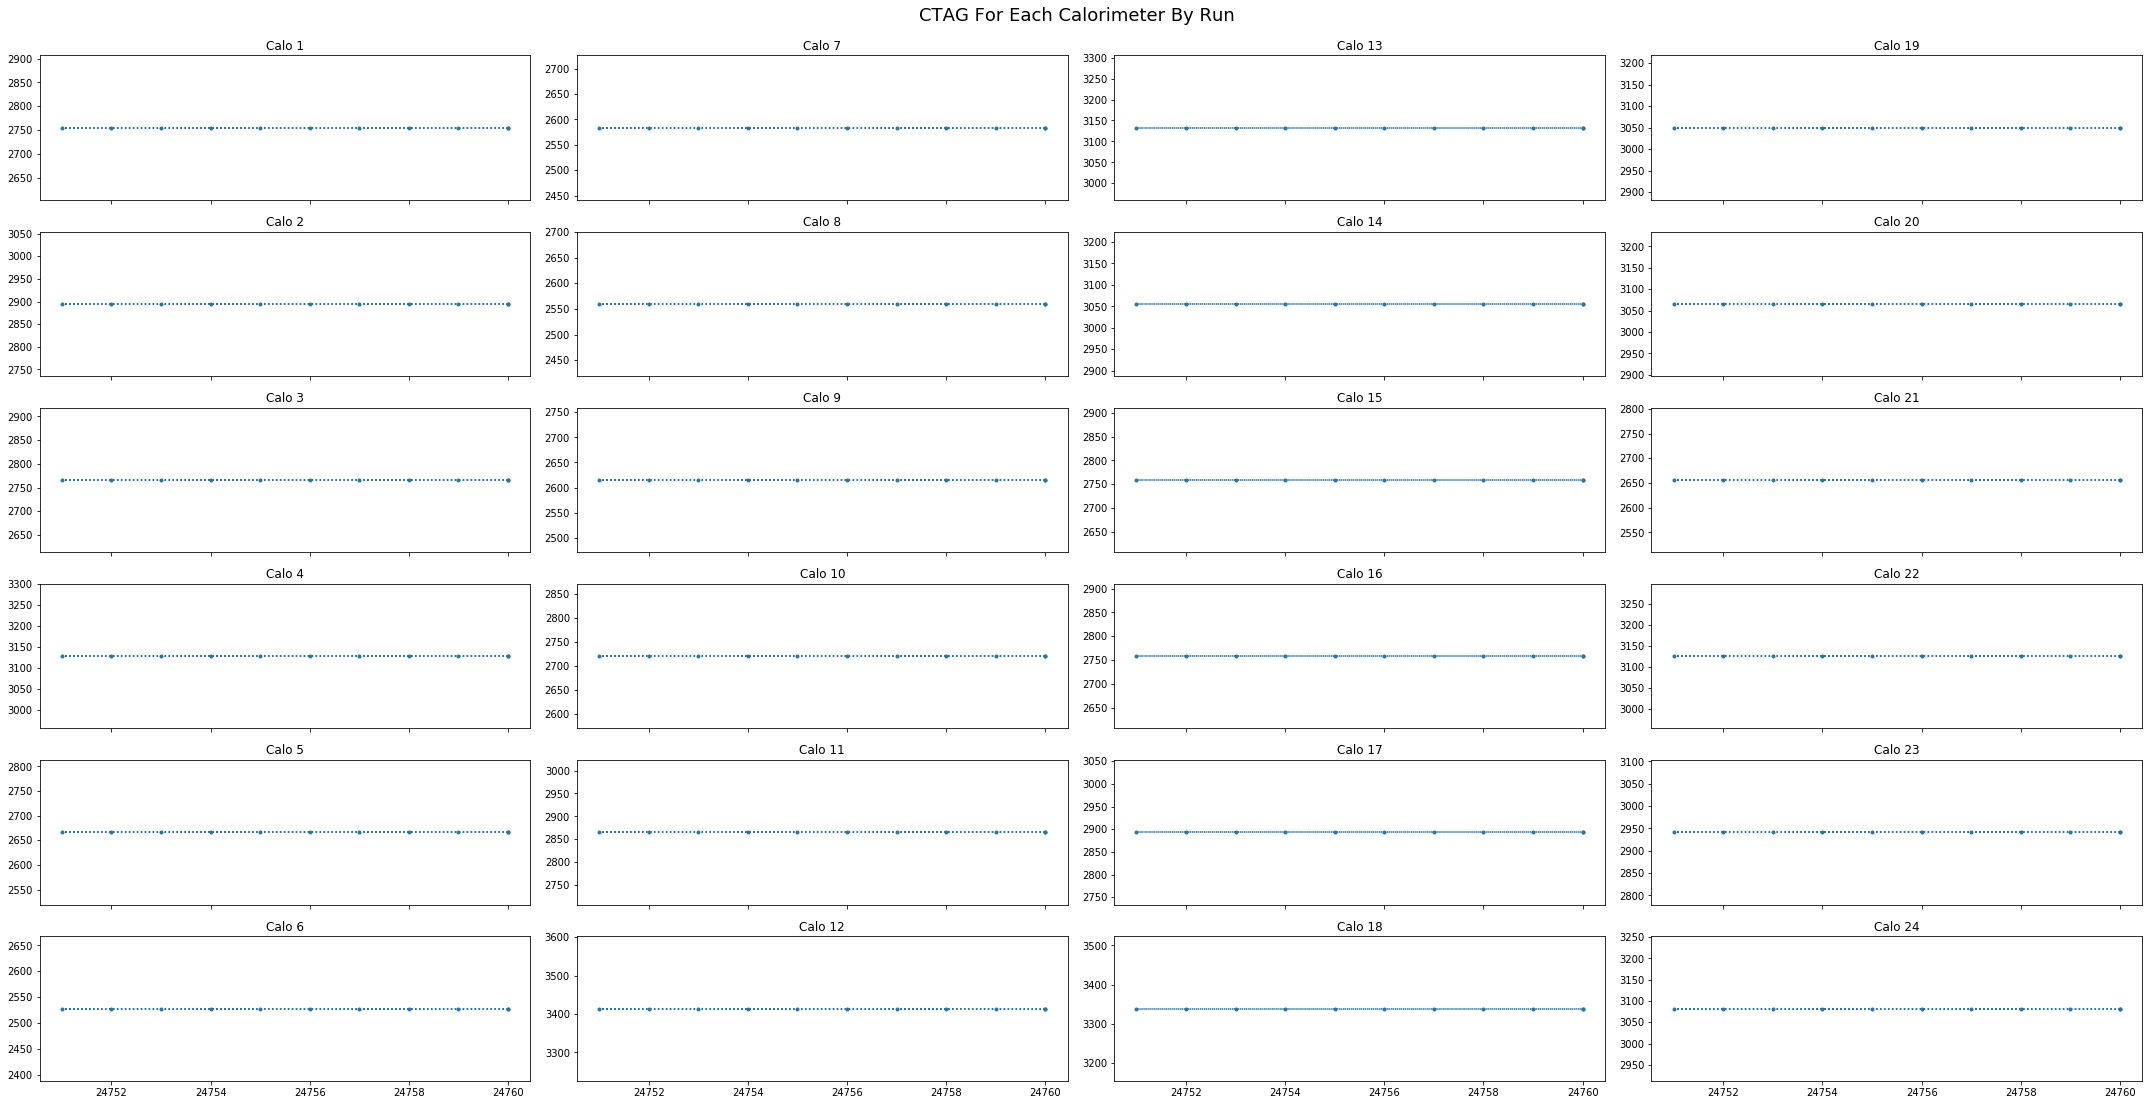

In [99]:
width = 6
fig, ax = plt.subplots(width,4,figsize=(30,15),sharex = True)

calo = 1
for caloDouble in zip(*allCtags):
    #print(calo, caloDouble)
    i = calo -1
    axi = ax[i % width][int(i/width)]
    axi.plot(allRuns, caloDouble, ".:", label="calo "+str(calo))
    axi.set_title("Calo "+str(calo))
    calo += 1
    
plt.tight_layout()
plt.suptitle("CTAG For Each Calorimeter By Run",fontsize=18, y=1.02)

plt.savefig("./CTAG_By_Calorimeter.png",bbox_inches="tight")

plt.show()

No handles with labels found to put in legend.


(24760, 24751, 24752, 24753, 24754, 24755, 24756, 24757, 24758, 24759, 24760)


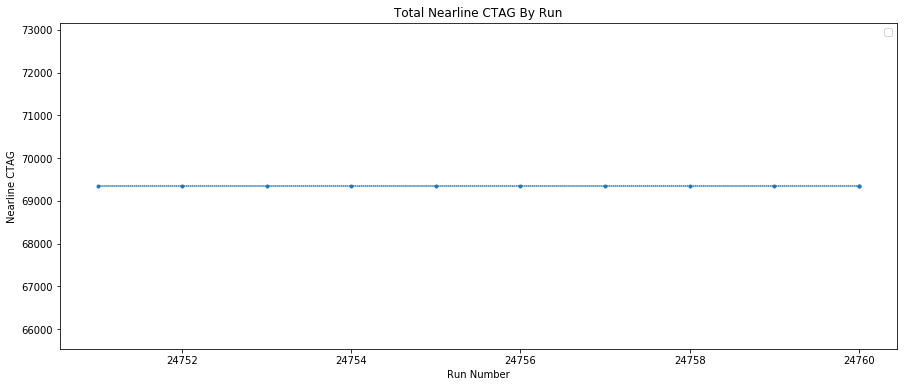

In [105]:
print(allRuns)
#print(allDoubles)
fig,ax = plt.subplots(figsize=(15,6))
plt.title("Total Nearline CTAG By Run")
plt.xlabel("Run Number")
plt.ylabel("Nearline CTAG")
calo = 1

totalCtags = []
for x in allCtags:
    totalCtags.append(np.sum(x))
    
plt.plot(allRuns, totalCtags,".:")

    
plt.legend(ncol=8)
plt.savefig("./CTAG_All_Calorimeters.png",bbox_inches="tight")

plt.show()

No handles with labels found to put in legend.


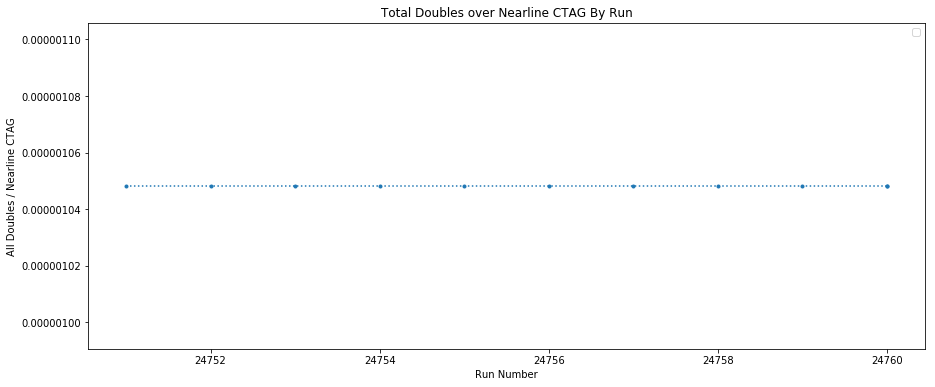

In [119]:

totalDoubles = []
for x in allDoubles:
    totalDoubles.append(np.sum(x))

totalDoublesNorm = []
for x,y in zip(allDoubles, allCtags):
    if(np.sum(y) > 0):
        totalDoublesNorm.append(np.sum(x)/np.sum(y))

fig,ax = plt.subplots(figsize=(15,6))
plt.title("Total Doubles over Nearline CTAG By Run")
plt.xlabel("Run Number")
plt.ylabel("All Doubles / Nearline CTAG")

plt.plot(allRuns, totalDoublesNorm,".:")


plt.legend(ncol=8)
plt.savefig("./Total_Doubles_Over_CTAG_All_Calorimeters.png",bbox_inches="tight")
plt.show()